In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from copy import deepcopy
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
import geopandas as gpd

file_path = 'onb-v3-2-2-dpt95.gpkg'
gdf = gpd.read_file(file_path)

In [ ]:
gdf

In [ ]:
ademe_knn=pd.read_json('ADEME_Knn.json').transpose()
df=pd.read_json('ADEME.json')

df=pd.json_normalize(df['results'])




In [94]:


# FEATURES REDUITS (lorsqu'on a pas le DPE)
selected_features_1=['Etiquette_DPE','Qualité_isolation_plancher_bas', 'Type_bâtiment', 'Période_construction', 'Hauteur_sous-plafond', 'Classe_inertie_bâtiment', 'Classe_altitude', 'Zone_climatique_', 'Coordonnée_cartographique_X_(BAN)', 'Coordonnée_cartographique_Y_(BAN)', 'Deperditions_baies_vitrées', 'Deperditions_enveloppe', 'Déperditions_murs', 'Deperditions_planchers_bas', 'Deperditions_planchers_hauts', 'Déperditions_ponts_thermiques', 'Déperditions_portes', 'Déperditions_renouvellement_air', 'Qualité_isolation_enveloppe', 'Qualité_isolation_menuiseries', 'Qualité_isolation_murs',]

#Fearues ademe+partenariatit/appel
selected_features_partenariat=['Etiquette_DPE', 'Type_bâtiment', 'Période_construction', 'Hauteur_sous-plafond', 'Classe_inertie_bâtiment', 'Classe_altitude', 'Zone_climatique_', 'Coordonnée_cartographique_X_(BAN)', 'Coordonnée_cartographique_Y_(BAN)', 'Conso_5_usages_é_finale', 'Conso_5_usages/m²_é_finale', 'Conso_chauffage_é_finale', 'Conso_chauffage_dépensier_é_finale', 'Conso_éclairage_é_finale', 'Conso_ECS_é_finale', 'Conso_ECS_dépensier_é_finale', 'Conso_refroidissement_é_finale', 'Conso_refroidissement_dépensier_é_finale', 'Conso_auxiliaires_é_finale', 'Conso_5_usages_é_primaire', 'Conso_5_usages_par_m²_é_primaire', 'Conso_chauffage_é_primaire', 'Conso_chauffage_dépensier_é_primaire', 'Conso_éclairage_é_primaire', 'Conso_ECS_é_primaire', 'Conso_ECS_dépensier_é_primaire', 'Conso_refroidissement_é_primaire', 'Conso_refroidissement_dépensier_é_primaire', 'Conso_auxiliaires_é_primaire', 'Emission_GES_5_usages', 'Emission_GES_5_usages_par_m²', 'Emission_GES_chauffage', 'Emission_GES_chauffage_dépensier', 'Emission_GES_éclairage', 'Emission_GES_ECS', 'Emission_GES_ECS_dépensier', 'Emission_GES_refroidissement', 'Emission_GES_refroidissement_dépensier', 'Emission_GES_auxiliaires', 'Conso_5_usages_é_finale_énergie_n°1', 'Conso_chauffage_é_finale_énergie_n°1', 'Conso_ECS_é_finale_énergie_n°1', 'Coût_total_5_usages_énergie_n°1', 'Coût_chauffage_énergie_n°1', 'Coût_ECS_énergie_n°1', 'Emission_GES_5_usages_énergie_n°1', 'Emission_GES_chauffage_énergie_n°1', 'Emission_GES_ECS_énergie_n°1', 'Type_énergie_n°1', 'Coût_total_5_usages', 'Coût_chauffage', 'Coût_chauffage_dépensier', 'Coût_éclairage', 'Coût_ECS', 'Coût_ECS_dépensier', 'Coût_refroidissement', 'Coût_refroidissement_dépensier', 'Coût_auxiliaires', 'Type_énergie_principale_chauffage', 'Conso_chauffage_installation_chauffage_n°1', 'Conso_chauffage_dépensier_installation_chauffage_n°1', 'Type_énergie_générateur_n°1_installation_n°1', 'Type_générateur_n°1_installation_n°1', 'Type_énergie_principale_ECS', 'Conso_é_finale_installation_ECS', 'Conso_é_finale_dépensier_installation_ECS', 'Type_installation_ECS', 'Surface_habitable_desservie_par_installation_ECS', 'Conso_é_finale_générateur_ECS_n°1', 'Conso_é_finale_dépensier_générateur_ECS_n°1', 'Type_énergie_générateur_ECS_n°1', 'Type_générateur_ECS_n°1', 'Volume_stockage_générateur_ECS_n°1', 'Production_électricité_PV_(kWhep/an)',]

#Features Ademe+visite/drone+Partenariat
selected_features_comp=['Etiquette_DPE', 'Type_bâtiment', 'Période_construction', 'Hauteur_sous-plafond', 'Classe_inertie_bâtiment', 'Classe_altitude', 'Zone_climatique_', 'Coordonnée_cartographique_X_(BAN)', 'Coordonnée_cartographique_Y_(BAN)', 'Deperditions_baies_vitrées', 'Deperditions_enveloppe', 'Déperditions_murs', 'Deperditions_planchers_bas', 'Deperditions_planchers_hauts', 'Déperditions_ponts_thermiques', 'Déperditions_portes', 'Déperditions_renouvellement_air', 'Qualité_isolation_enveloppe', 'Qualité_isolation_menuiseries', 'Qualité_isolation_murs', 'Conso_5_usages_é_finale', 'Conso_5_usages/m²_é_finale', 'Conso_chauffage_é_finale', 'Conso_chauffage_dépensier_é_finale', 'Conso_éclairage_é_finale', 'Conso_ECS_é_finale', 'Conso_ECS_dépensier_é_finale', 'Conso_refroidissement_é_finale', 'Conso_refroidissement_dépensier_é_finale', 'Conso_auxiliaires_é_finale', 'Conso_5_usages_é_primaire', 'Conso_5_usages_par_m²_é_primaire', 'Conso_chauffage_é_primaire', 'Conso_chauffage_dépensier_é_primaire', 'Conso_éclairage_é_primaire', 'Conso_ECS_é_primaire', 'Conso_ECS_dépensier_é_primaire', 'Conso_refroidissement_é_primaire', 'Conso_refroidissement_dépensier_é_primaire', 'Conso_auxiliaires_é_primaire', 'Emission_GES_5_usages','Qualité_isolation_plancher_bas', 'Emission_GES_5_usages_par_m²', 'Emission_GES_chauffage', 'Emission_GES_chauffage_dépensier', 'Emission_GES_éclairage', 'Emission_GES_ECS', 'Emission_GES_ECS_dépensier', 'Emission_GES_refroidissement', 'Emission_GES_refroidissement_dépensier', 'Emission_GES_auxiliaires', 'Conso_5_usages_é_finale_énergie_n°1', 'Conso_chauffage_é_finale_énergie_n°1', 'Conso_ECS_é_finale_énergie_n°1', 'Coût_total_5_usages_énergie_n°1', 'Coût_chauffage_énergie_n°1', 'Coût_ECS_énergie_n°1', 'Emission_GES_5_usages_énergie_n°1', 'Emission_GES_chauffage_énergie_n°1', 'Emission_GES_ECS_énergie_n°1', 'Type_énergie_n°1', 'Coût_total_5_usages', 'Coût_chauffage', 'Coût_chauffage_dépensier', 'Coût_éclairage', 'Coût_ECS', 'Coût_ECS_dépensier', 'Coût_refroidissement', 'Coût_refroidissement_dépensier', 'Coût_auxiliaires', 'Type_énergie_principale_chauffage', 'Conso_chauffage_installation_chauffage_n°1', 'Conso_chauffage_dépensier_installation_chauffage_n°1', 'Type_énergie_générateur_n°1_installation_n°1', 'Type_générateur_n°1_installation_n°1', 'Type_énergie_principale_ECS', 'Conso_é_finale_installation_ECS', 'Conso_é_finale_dépensier_installation_ECS', 'Type_installation_ECS', 'Surface_habitable_desservie_par_installation_ECS', 'Conso_é_finale_générateur_ECS_n°1', 'Conso_é_finale_dépensier_générateur_ECS_n°1', 'Type_énergie_générateur_ECS_n°1', 'Type_générateur_ECS_n°1', 'Volume_stockage_générateur_ECS_n°1', 'Production_électricité_PV_(kWhep/an)',]


In [114]:
#  Pas de partenariat pour les données d'emissions et de consommation
var_cat=['Type_bâtiment', 'Période_construction','Classe_inertie_bâtiment', 'Classe_altitude', 'Zone_climatique_','Qualité_isolation_enveloppe', 'Qualité_isolation_menuiseries', 'Qualité_isolation_murs','Type_énergie_n°1','Type_énergie_principale_chauffage','Type_énergie_générateur_n°1_installation_n°1','Type_générateur_n°1_installation_n°1','Type_énergie_principale_ECS','Type_installation_ECS','Type_énergie_générateur_ECS_n°1','Type_générateur_ECS_n°1']
selected_features_sans_partenat=['Etiquette_DPE', 'Type_bâtiment', 'Période_construction', 'Hauteur_sous-plafond', 'Classe_inertie_bâtiment', 'Classe_altitude', 'Zone_climatique_', 'Coordonnée_cartographique_X_(BAN)', 'Coordonnée_cartographique_Y_(BAN)', 'Deperditions_baies_vitrées', 'Deperditions_enveloppe', 'Déperditions_murs', 'Deperditions_planchers_bas', 'Deperditions_planchers_hauts', 'Déperditions_ponts_thermiques', 'Déperditions_portes', 'Déperditions_renouvellement_air', 'Qualité_isolation_enveloppe', 'Qualité_isolation_menuiseries', 'Qualité_isolation_murs','Type_énergie_n°1','Type_énergie_principale_chauffage', 'Type_énergie_générateur_n°1_installation_n°1', 'Type_générateur_n°1_installation_n°1', 'Type_énergie_principale_ECS','Type_installation_ECS', 'Surface_habitable_desservie_par_installation_ECS',  'Type_énergie_générateur_ECS_n°1', 'Type_générateur_ECS_n°1',]

In [95]:
var_cat1=['Qualité_isolation_menuiseries','Période_construction','Qualité_isolation_plancher_bas','Qualité_isolation_enveloppe','Qualité_isolation_murs','Classe_altitude','Zone_climatique_','Classe_inertie_bâtiment','Type_bâtiment',]

var_cat2=[ 'Type_bâtiment', 'Période_construction', 'Classe_inertie_bâtiment', 'Classe_altitude', 'Zone_climatique_' ,'Type_énergie_n°1','Type_énergie_principale_chauffage','Type_énergie_générateur_n°1_installation_n°1', 'Type_générateur_n°1_installation_n°1', 'Type_énergie_principale_ECS', 'Type_installation_ECS', 'Type_énergie_générateur_ECS_n°1', 'Type_générateur_ECS_n°1' ]
var_cat3=['Classe_inertie_bâtiment', 'Classe_altitude', 'Zone_climatique_','Type_bâtiment', 'Période_construction','Qualité_isolation_plancher_bas','Qualité_isolation_enveloppe', 'Qualité_isolation_menuiseries', 'Qualité_isolation_murs','Type_énergie_n°1','Type_énergie_principale_chauffage','Type_énergie_générateur_n°1_installation_n°1', 'Type_générateur_n°1_installation_n°1', 'Type_énergie_principale_ECS','Type_installation_ECS', 'Type_énergie_générateur_ECS_n°1', 'Type_générateur_ECS_n°1',]




In [96]:
#df_encoded = pd.get_dummies(df, columns=var_cat,drop_first=True)
def encoding(df,var_cat,selected_features):
    df_encoded=df[selected_features]
    df_encoded.dropna(inplace=True)

    added_dummies = set()

    for feature in var_cat:
        dummies = pd.get_dummies(df_encoded[feature], prefix=feature,drop_first=True)
        
        new_cols = [col for col in dummies.columns if col not in added_dummies]
        
        df_encoded = pd.concat([df_encoded.drop(feature, axis=1), dummies[new_cols]], axis=1)
        added_dummies.update(new_cols)
    

    mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}
    df_encoded['Etiquette_DPE'] = df_encoded['Etiquette_DPE'].map(mapping)

    numerical_features= [col for col in selected_features if col not in var_cat and df[col].dtype != 'object']

    scaler = StandardScaler()

    df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])
    return df_encoded


In [115]:
df_encoded=encoding(df,var_cat,selected_features_sans_partenat)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [97]:
df_encoded_1=encoding(df,var_cat1,selected_features_1)
df_encoded_2=encoding(df,var_cat2,selected_features_partenariat)
df_encoded_3=encoding(df,var_cat3,selected_features_comp)

C:\Users\bacca\AppData\Local\Temp/ipykernel_19172/1712318618.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded.dropna(inplace=True)
C:\Users\bacca\AppData\Local\Temp/ipykernel_19172/1712318618.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded.dropna(inplace=True)
C:\Users\bacca\AppData\Local\Temp/ipykernel_19172/1712318618.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded.dropna(inplace=True)


### Train test split for the training

In [98]:
X1,y1=df_encoded_1.drop('Etiquette_DPE',axis=1),df_encoded_1['Etiquette_DPE']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

X2,y2=df_encoded_2.drop('Etiquette_DPE',axis=1),df_encoded_2['Etiquette_DPE']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

X3,y3=df_encoded_3.drop('Etiquette_DPE',axis=1),df_encoded_3['Etiquette_DPE']
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)


## 1. Xgboost

In [117]:
X,y=df_encoded.drop('Etiquette_DPE',axis=1),df_encoded['Etiquette_DPE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [119]:
y_pred = xgb_classifier.predict(X_test)
accuracy_score(y_test,y_pred)


0.6737804878048781

In [99]:

xgb_classifier1 = XGBClassifier() # features réduits
xgb_classifier1.fit(X_train1, y_train1)

xgb_classifier2 = XGBClassifier() #ADEME+partenariat
xgb_classifier2.fit(X_train2, y_train2)

xgb_classifier3 = XGBClassifier() #Features comp
xgb_classifier3.fit(X_train3, y_train3)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [100]:
y_pred1 = xgb_classifier1.predict(X_test1)
y_pred2 = xgb_classifier2.predict(X_test2)
y_pred3 = xgb_classifier3.predict(X_test3)

In [101]:
accuracy_score(y_test1,y_pred1)


0.5890760592138846

In [102]:
accuracy_score(y_test2,y_pred2)

0.9949290060851927

In [103]:
accuracy_score(y_test3,y_pred3)

0.9892583120204603

In [120]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm1 = confusion_matrix(y_test1, y_pred1)
cm2 = confusion_matrix(y_test2, y_pred2)
cm3 = confusion_matrix(y_test3, y_pred3)
cm=confusion_matrix(y_test,y_pred)


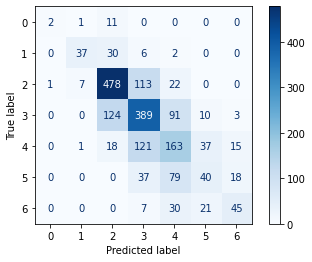

In [107]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp.plot(cmap=plt.cm.Blues)  
plt.show()

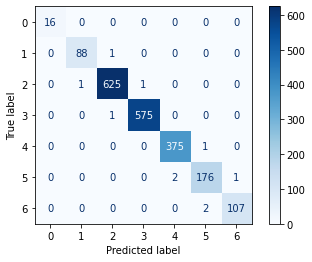

In [108]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp.plot(cmap=plt.cm.Blues)  
plt.show()

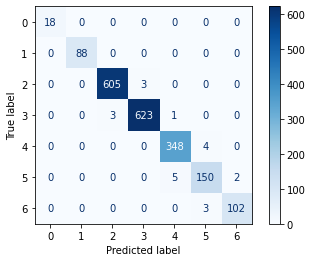

In [109]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm3)
disp.plot(cmap=plt.cm.Blues)  
plt.show()

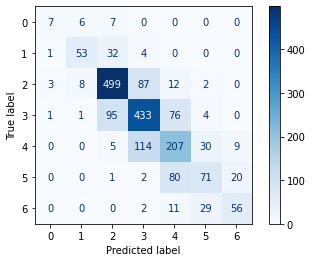

In [121]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)  
plt.show()

#### Feature importance for the Xgboost model  (Visite+ deone mais sans partenariat )

[09:29:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.


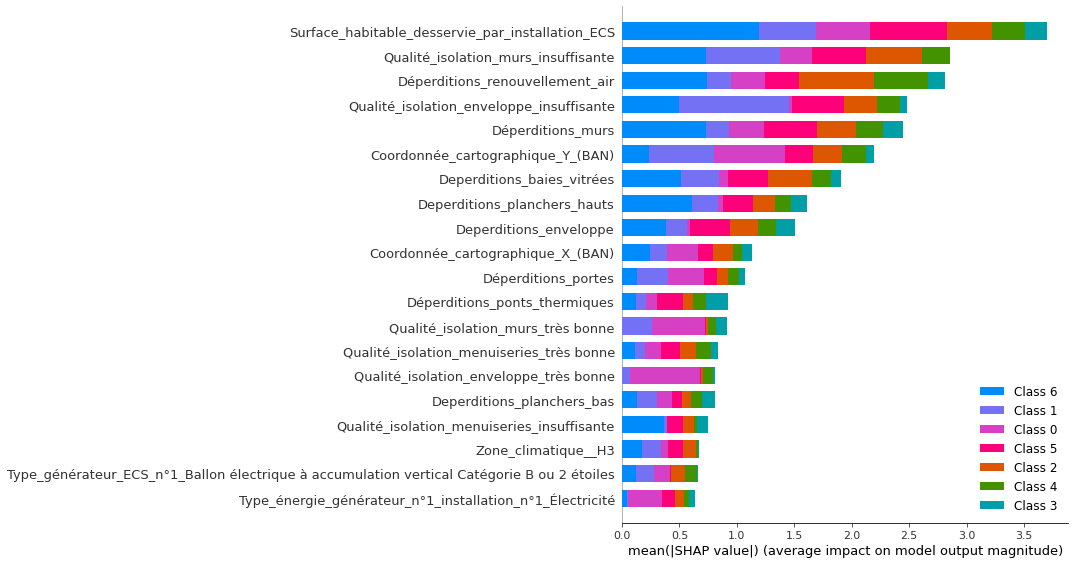

In [122]:
import shap

explainer = shap.TreeExplainer(xgb_classifier)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

# 2. Réseau de neurones

In [112]:
def nn_preprocessing(X_train,y_train,X_test,y_test):
    X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
    X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
    y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

    train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
    test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)
    return (train_loader,test_loader,y_train_tensor,y_test_tensor)


train_loader1,test_loader1,y_train_tensor1,y_test_tensor1=nn_preprocessing(X_train1,y_train1,X_test1,y_test1)
train_loader2,test_loader2,y_train_tensor2,y_test_tensor2=nn_preprocessing(X_train2,y_train2,X_test2,y_test2)
train_loader3,test_loader3,y_train_tensor3,y_test_tensor3=nn_preprocessing(X_train3,y_train3,X_test3,y_test3)

class Net(nn.Module):
    def __init__(self, input_size, hidden1_size, hidden2_size, num_classes):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1_size) 
        self.fc2 = nn.Linear(hidden1_size, hidden2_size)  
        self.fc3 = nn.Linear(hidden2_size, num_classes)  

    def forward(self, x, return_raw_scores=False):
        x = F.relu(self.fc1(x))  
        x = F.relu(self.fc2(x))  
        scores = self.fc3(x)  

        if return_raw_scores:
            return scores

        return F.log_softmax(scores, dim=1)



In [ ]:
input_size = X_train3.shape[1]  
hidden1_size = 128  
hidden2_size = 64  

num_classes = len(y_train3.unique())
net = Net(input_size=input_size, hidden1_size=hidden1_size, hidden2_size=hidden2_size, num_classes=num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

for epoch in range(100):  
    for inputs, labels in train_loader3:
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')

correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader3:
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the test dataset: {100 * correct / total}%')

In [ ]:
''''net.eval()

# Example: Analyzing feature importance for a single batch from the test set
inputs, labels = next(iter(test_loader))
inputs.requires_grad = True

# Forward pass to get logits
outputs = net(inputs, return_raw_scores=True)

# You can select outputs for a specific class or the predicted classes
# For simplicity, let's use the predicted classes here
_, preds = torch.max(outputs, 1)

# Compute the loss for the predicted classes to use it as a scalar for .backward()
loss = criterion(outputs, torch.tensor(preds))
net.zero_grad()  # Zero any existing gradients
loss.backward()  # Compute gradients of the loss with respect to the input

# inputs.grad will now contain the gradients of the output with respect to the input features
gradients = inputs.grad.data

# Analyzing gradients - you can take the absolute, mean, or sum to understand feature importance
feature_importance = gradients.abs().mean(dim=0)

''''

In [ ]:
'''feature_importance_df = pd.DataFrame({
    'Feature': list(X_train.columns),
    'Importance': feature_importance.numpy()  # Convert tensor to numpy array if needed
})

# Sort the DataFrame by importance if desired
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame
print(feature_importance_df)'''

In [ ]:
'''import pandas as pd
import matplotlib.pyplot as plt
import torch

feature_importance_df = pd.DataFrame({
    'Feature': list(X_train.columns),
    'Importance': feature_importance.numpy()  # Convert tensor to numpy if it's not already
})

# Sort the DataFrame by importance and select the top 20
top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(20)

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 20 Features by Importance')
plt.gca().invert_yaxis()  # To display the highest importance feature at the top
plt.show()
'''

In [ ]:
feature_gradients = {i: torch.zeros(input_size) for i in range(num_classes)}
batch_counts = {i: 0 for i in range(num_classes)}
reverse_mapping = {v: k for k, v in mapping.items()}

net.eval()

# Iterate over all batches in the test_loader
for inputs, labels in test_loader:
    inputs.requires_grad = True
    
    outputs = net(inputs, return_raw_scores=True)
    
    # Iterate over each class and accumulate gradients
    for i in range(num_classes):
        net.zero_grad()  # Reset gradients before backpropagation
        class_scores = outputs[:, i]
        class_scores.mean().backward(retain_graph=True)  # Backpropagate for class i
        
        feature_gradients[i] += inputs.grad.data.abs().sum(dim=0)
        batch_counts[i] += 1

# Normalize gradients by the number of batches to compute mean importance
for i in range(num_classes):
    feature_gradients[i] /= batch_counts[i]

for i in range(num_classes):
    feature_importance = feature_gradients[i].numpy()  # Convert to numpy array
    
    feature_importance_df = pd.DataFrame({
        'Feature': list(X_train.columns),
        'Importance': feature_importance
    }).sort_values(by='Importance', ascending=False).head(30)  # Select top 20 features

    original_label = reverse_mapping[i]
    plt.figure(figsize=(10, 8))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.title(f'Top 20 Features by Importance for Class {original_label}')
    plt.gca().invert_yaxis()  # Highest importance at top
    plt.show()


## Analyze the activations during training for each target class

In [ ]:
### Activations during training


import torch.optim as optim


# Initialize a dictionary to store feature importance for each class
feature_importance_per_class = {class_id: torch.zeros(60) for class_id in range(num_classes)}
count_per_class = {class_id: 0 for class_id in range(7)}

for epoch in range(100):  
    for inputs, labels in train_loader:
        inputs.requires_grad = True
        
        # Forward pass
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass
        net.zero_grad()
        loss.backward()
        
        # For each class, update feature importance based on gradients
        _, preds = torch.max(outputs, 1)
        for class_id in range(num_classes):
            class_mask = labels == class_id
            if class_mask.any():
                # Accumulate gradients for the specific class
                class_specific_grads = inputs.grad[class_mask].abs().sum(dim=0)
                feature_importance_per_class[class_id] += class_specific_grads
                count_per_class[class_id] += class_mask.sum().item()
        
        # Update model parameters
        optimizer.step()

# Normalize feature importance by the count of samples for each class to get mean importance
for class_id in feature_importance_per_class:
    feature_importance_per_class[class_id] /= count_per_class[class_id]

# Convert feature importance to a more user-friendly format, e.g., a DataFrame
# Assuming X_train.columns contains the feature names
import pandas as pd

feature_importance_dfs = {}
for class_id, importance in feature_importance_per_class.items():
    df = pd.DataFrame({
        'Feature': list(X_train.columns),
        'Importance': importance.numpy()
    }).sort_values(by='Importance', ascending=False)
    feature_importance_dfs[class_id] = df



feature_importance_dfs